<a href="https://colab.research.google.com/github/kirillkobychev/MLHSE/blob/homework/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Библиотеки Matplotlib, Seaborn

Задание выполнил(а):

    (Кобычев Кирилл)

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'

In [7]:
df = pd.read_csv(GERMAN_CREDIT)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

### Задание 1 (0.5 балла)

Используя `numpy` и `matplotlib`, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ на интервале от $-\pi$ до $\pi$, используя 100 точек. Добавьте легенду и сетку.. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

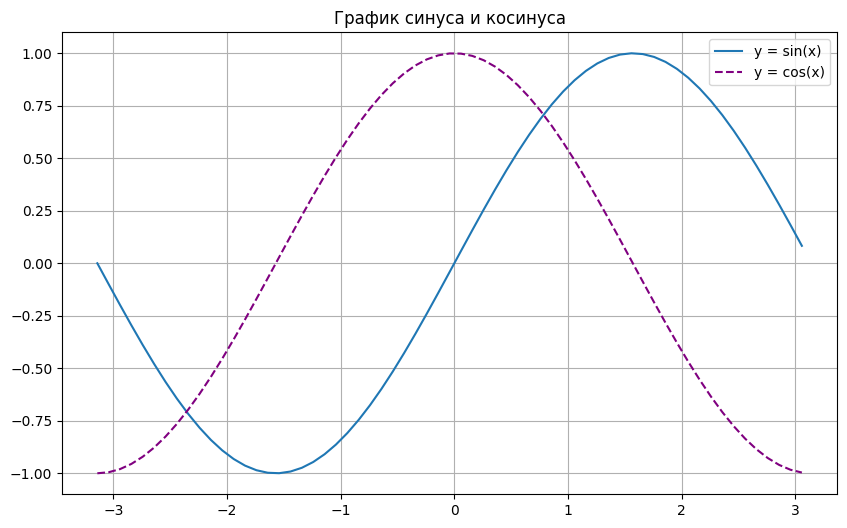

In [11]:
# ваш код здесь
x = np.arange(-np.pi, np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(10,6))
plt.plot(x, y_sin)
plt.plot(x, y_cos, linestyle='--', color='purple')
plt.grid()
plt.title("График синуса и косинуса")
plt.legend(['y = sin(x)', 'y = cos(x)'])

plt.show()

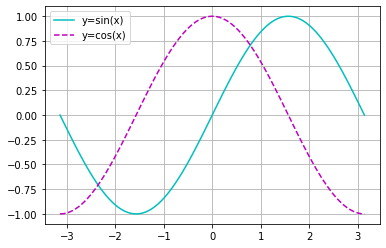

In [ ]:
# то что должно получиться

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

348
135


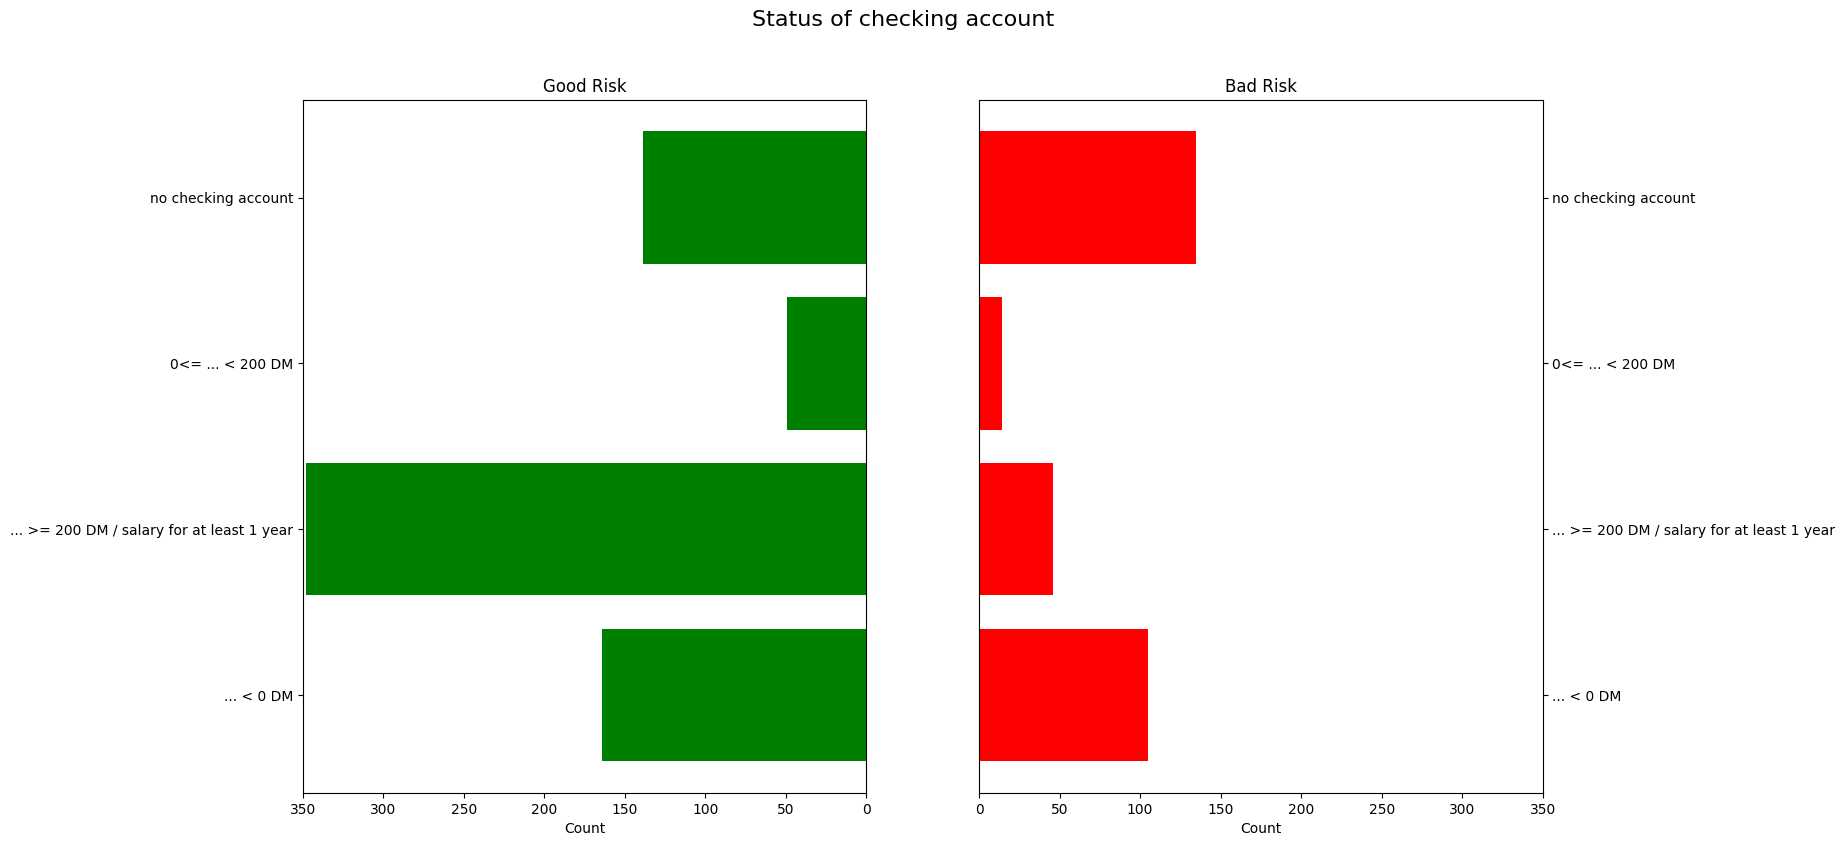

In [12]:
good_counts = df[df['credit_risk'] == 'good'].groupby('status').size().sort_index()
bad_counts = df[df['credit_risk'] == 'bad'].groupby('status').size().sort_index()
print(good_counts.max())
print(bad_counts.max())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

ax1.barh(good_counts.index, good_counts, color='green')
ax1.set_title('Good Risk')
ax1.set_xlabel('Count')
ax1.set_xlim(350, 0)

ax2.barh(bad_counts.index, bad_counts, color='red')
ax2.set_title('Bad Risk')
ax2.set_xlabel('Count')
ax2.set_xlim(0, 350)
ax2.yaxis.tick_right()

fig.suptitle('Status of checking account', fontsize=16)
plt.show()

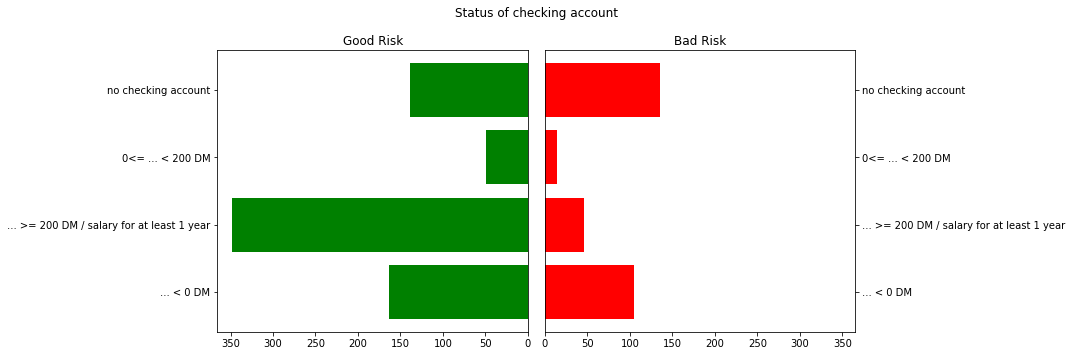

In [ ]:
# то что должно получиться

### Задание 3  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

***В этом случае конечно sns, просто кратко быстро и понятно), но если категориальных признаков в сравненнии будет больше я бы рассморел вариант графика - торнадо***

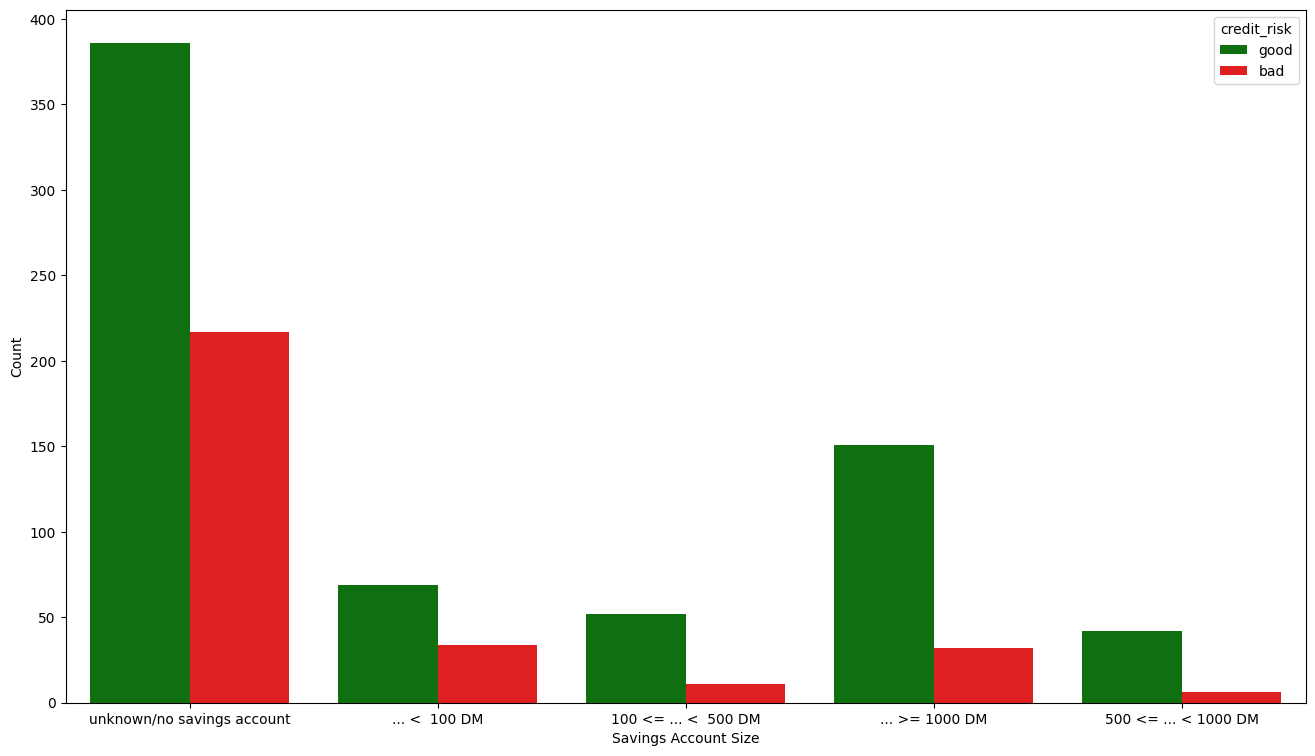

In [13]:
# ваш код здесь
plt.figure(figsize=(16,9))
sns.countplot(data=df, x='savings', hue='credit_risk', palette=['green', 'red'])
plt.xlabel('Savings Account Size')
plt.ylabel('Count')

plt.show()

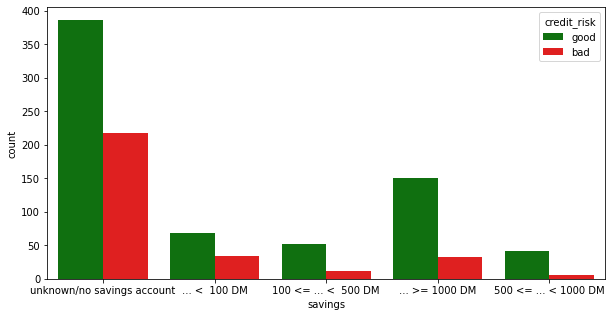

In [ ]:
# то что должно получиться

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

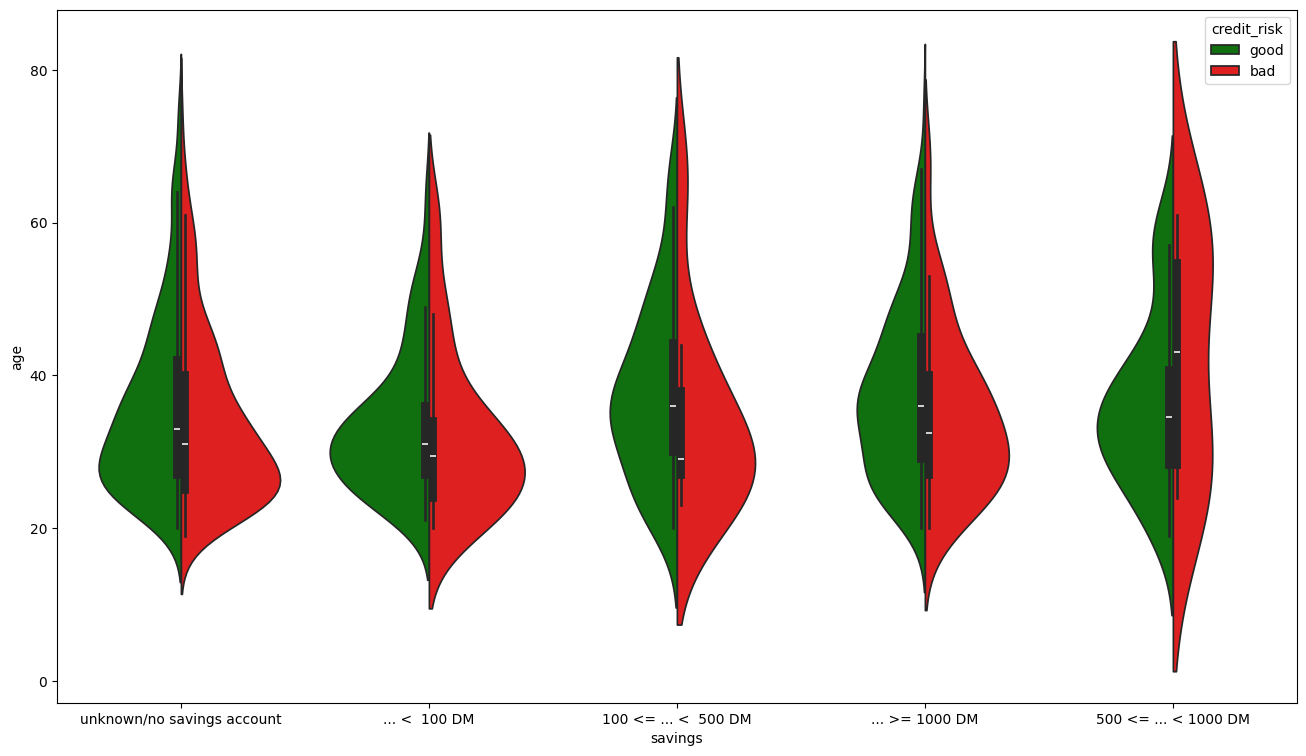

In [14]:
# ваш код здесь
plt.figure(figsize=(16,9))
sns.violinplot(data=df, x='savings', y='age', hue='credit_risk', split=True, palette=['green', 'red'])

plt.xlabel('savings')
plt.ylabel('age')

plt.show()

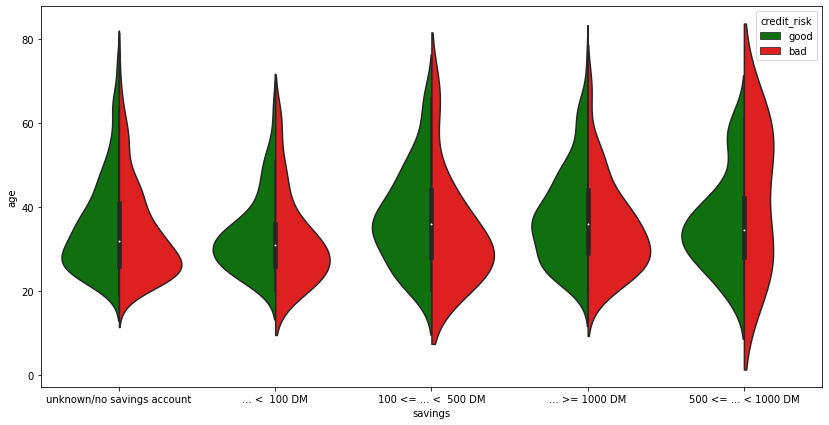

In [ ]:
# то что должно получиться

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

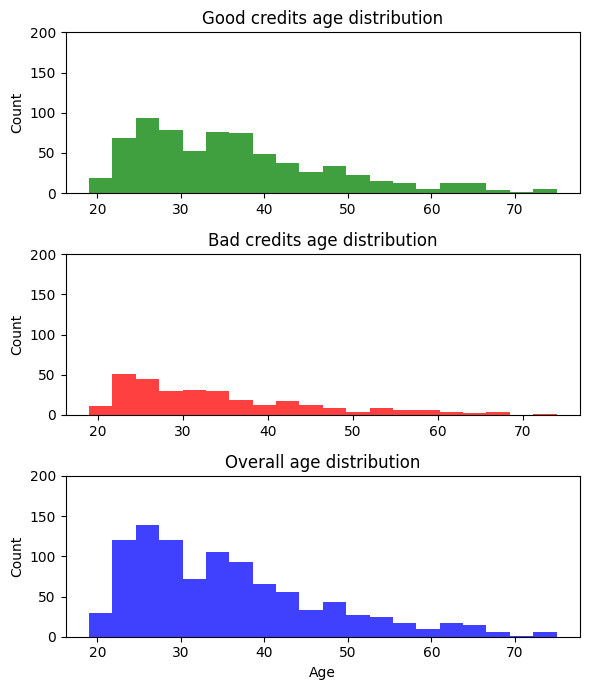

In [15]:
plt.figure(figsize=(6, 7))

plt.subplot(3, 1, 1)
sns.histplot(data = df[df['credit_risk'] == 'good'], x='age', bins=20, color='green', edgecolor=None)
plt.title('Good credits age distribution')
plt.ylabel('Count')
plt.xlabel('')
plt.ylim(0,200)

plt.subplot(3, 1, 2)
sns.histplot(data = df[df['credit_risk'] == 'bad'], x='age', bins=20, color='red', edgecolor=None)
plt.title('Bad credits age distribution')
plt.ylabel('Count')
plt.xlabel('')
plt.ylim(0,200)

plt.subplot(3, 1, 3)
sns.histplot(data = df, x='age', bins=20, color='blue', edgecolor=None)
plt.title('Overall age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,200)

plt.tight_layout()
plt.show()


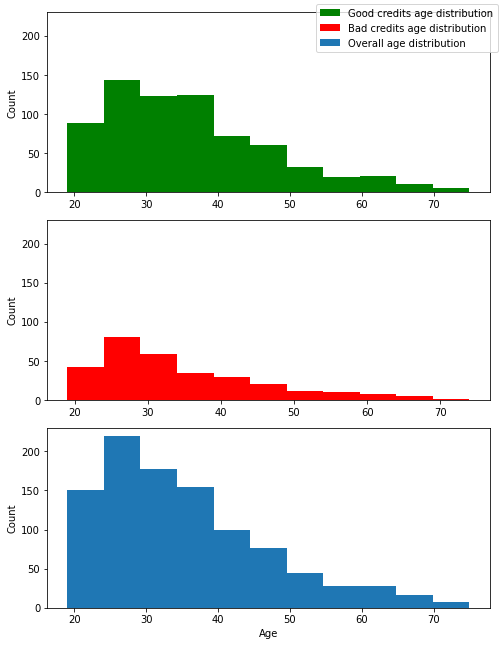

In [ ]:
# то что должно получиться

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

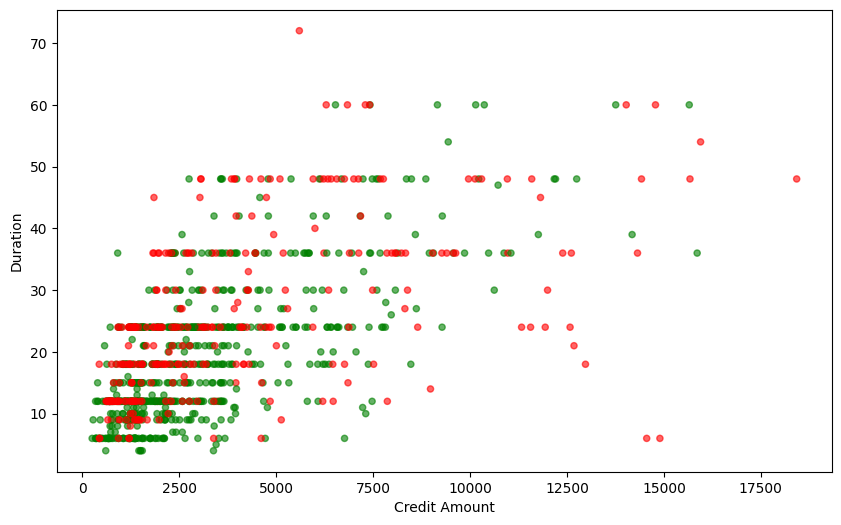

In [21]:
# ваш код здесь
df.plot.scatter(x='amount', y='duration', c=df['credit_risk'].map({'good': 'green', 'bad': 'red'}), figsize=(10, 6),alpha=0.6)

plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.show()

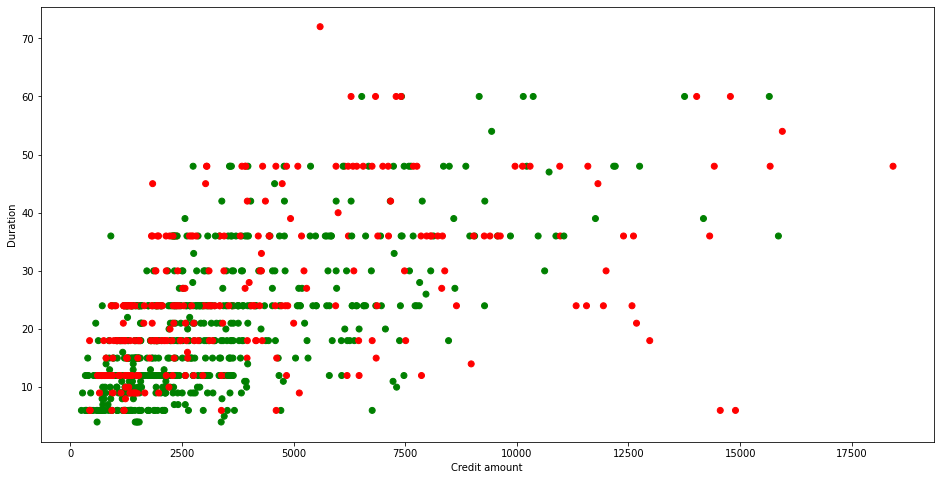

In [ ]:
# то что должно получиться

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

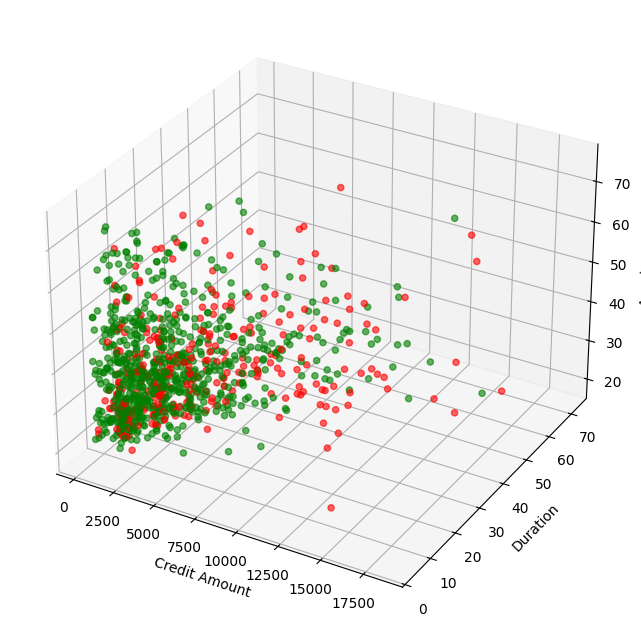

In [34]:
# ваш код здесь
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(df['amount'], df['duration'], df['age'], c=df['credit_risk'].map({'good': 'green', 'bad': 'red'}), alpha=0.6)

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age (years)')

plt.show()

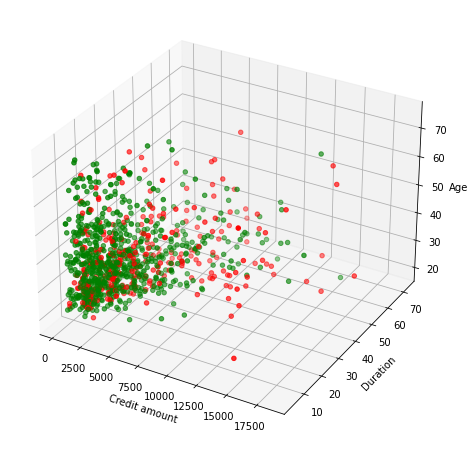

In [ ]:
# то что должно получиться

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

***Визуально проще оценить плотность распределения при нескольких факторах. Но на практике редко видел использование подобных графиков.***

## Раздел 2. Визуализации в датасете Netflix

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

In [35]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов содержат пропуски в столбце `director`.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

In [42]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


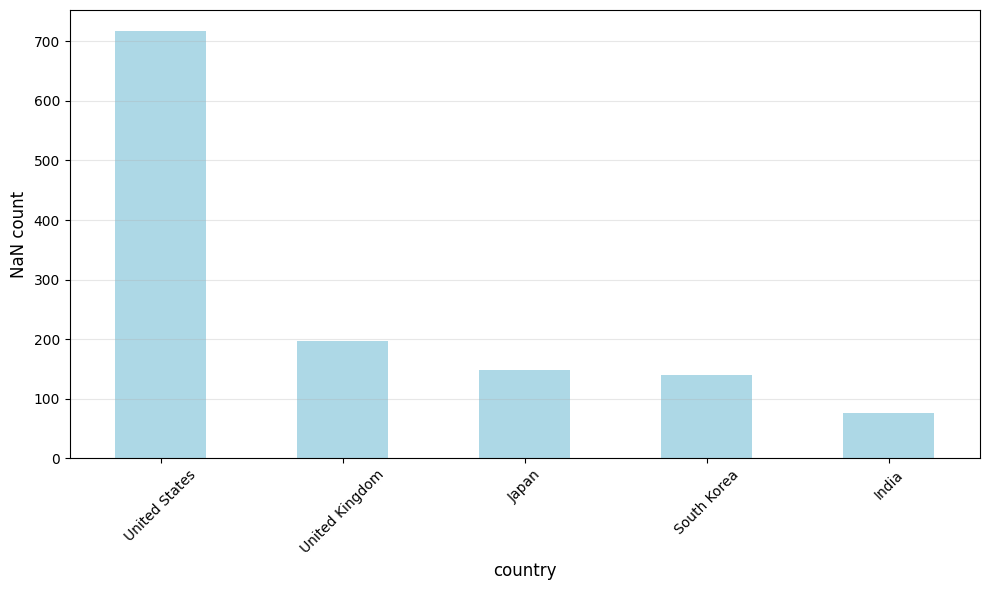

In [59]:
# ваш код здесь
df_netflix = pd.read_csv(NETFLIX_TITLES)
nan_director_count = df_netflix['director'].isna().sum()

director_country = df_netflix[df_netflix['director'].isna()].groupby('country').size().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
director_country.plot(kind='bar', color='lightblue')

plt.xlabel('country', fontsize=12)
plt.ylabel('NaN count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

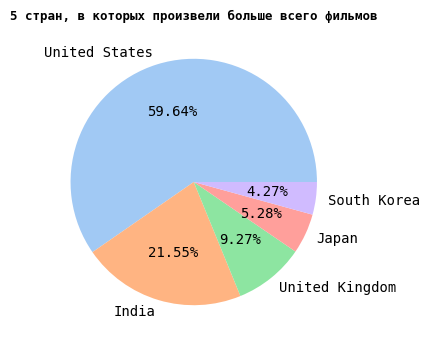

In [77]:
top_countries = df_netflix['country'].value_counts().head(5)
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(4, 4))
plt.pie(top_countries, labels=top_countries.index, colors=colors, autopct='%1.2f%%', textprops={'family': 'monospace'})
plt.title('5 стран, в которых произвели больше всего фильмов', family='monospace', fontweight='bold', fontsize=9)
plt.show()

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно.*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

In [84]:
# ваш код здесь
top_cntr = df_netflix['country'].value_counts().head(5)

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

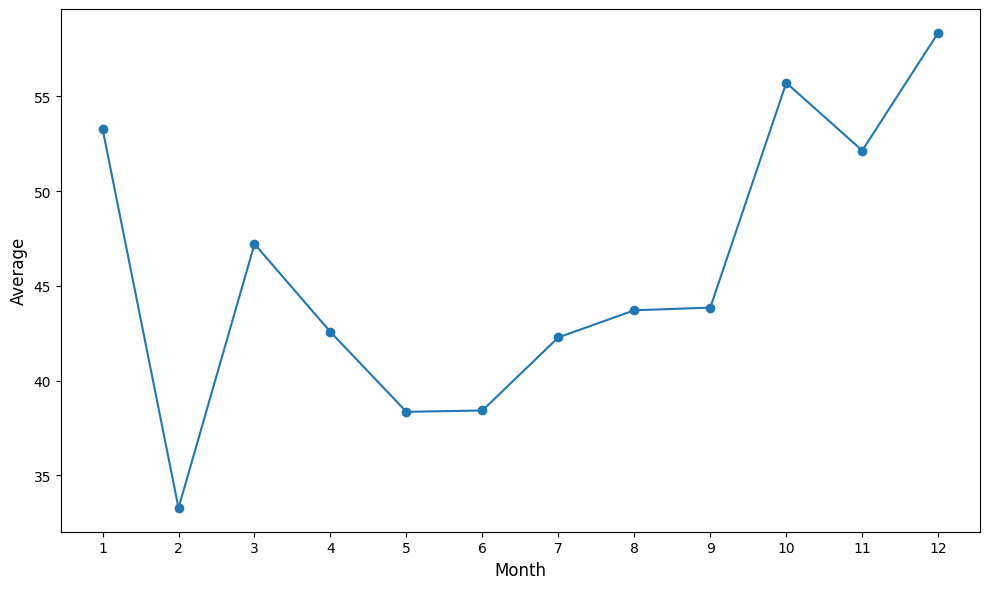

In [94]:
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])
#df_netflix.info()

df_netflix['month'] = df_netflix['date_added'].dt.month
df_netflix['year'] = df_netflix['date_added'].dt.year

monthly_avg = df_netflix.groupby('month').size() / df_netflix['year'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average', fontsize=12)

plt.xticks(range(1, 13, 1))
plt.tight_layout()
plt.show()

### Задание 5 (1 балл)

Постройте линейный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

In [ ]:
# ваш код здесь
...

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

In [ ]:
# ваш код здесь
...

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

In [ ]:
# ваш код здесь
...

### Задание 8* (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [ ]:
# ваш код здесь
...